<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Exercise (13)</h1>
<h2 style="color:#800080;text-align:center;">Machine Learning Algorithms: Regression</h2>

<b>Simple Linear Regression</b>

From moodle/ datasets, download the Students Score dataset and upload it to your Jupyter directory.

Create a new Juypter notebook called pract13SLRex.

<ol>
<li>Apply data Preprocessing (if needed)</li>
<li>Appy exploratory Data Analysis</li>
<li>Build a Machine learning algorithms model using Linear Regression</li>
<li>Evaluate the model</li>
</ol>

<b>Multiple Linear Regression</b>

From moodle/ datasets, download the Cars dataset and upload it to your Jupyter directory.

Create a new Juypter notebook called pract13MLRex.

<ol>
<li>Apply data Preprocessing (if needed)</li>
<li>Appy exploratory Data Analysis</li>
<li>Build a Machine learning algorithms model using Multiple Linear Regression</li>
<li>Evaluate the model</li>
</ol>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook

In [21]:
df = pd.read_csv("cars.csv")

In [22]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [37]:
le = LabelEncoder()
df['Car'] = le.fit_transform(df['Car'])
df['Model'] = le.fit_transform(df['Model'])


In [45]:
x = df.iloc[:,:3].values
df

,Car,Model,Volume,Weight,CO2
0,14,10,1000,790,99
1,10,29,1200,1160,95
2,12,14,1000,929,95
3,2,4,900,865,90
4,9,16,1500,1140,105
5,15,31,1000,929,105
6,12,18,1400,1109,90
7,8,5,1500,1365,92
8,3,19,1500,1112,98
9,0,6,1600,1150,99


<Axes: >

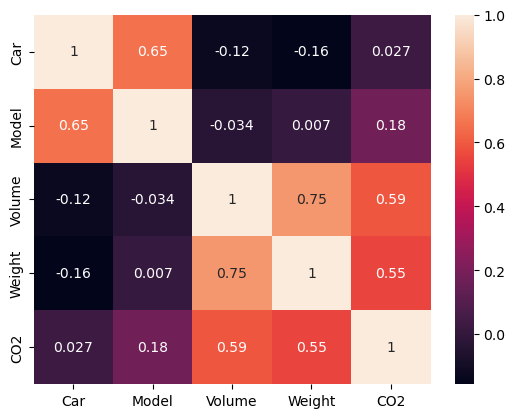

In [57]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

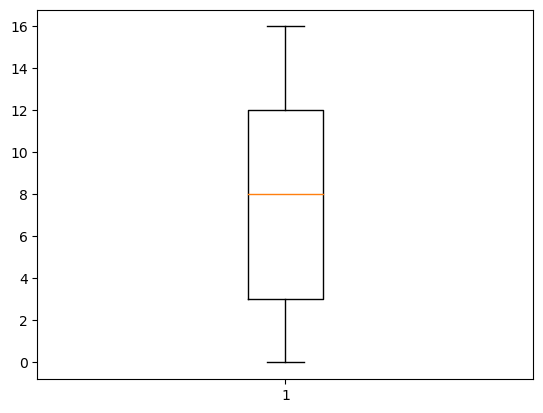

In [54]:
x = df.iloc[:,-5].values
y = df.iloc[:,-1].values

plt.boxplot(x)
plt.show()